# Prediction using Supervised Machine Learning

## Author: Thobani Sangweni

## Problem Statement

We need to predict the score of a student based on the number of hours they spent studying. We use **Linear Regression** here to explore the data, analyse and train our model.

Here we first import the necessary libraries for data manipulation, visualization, model evaluation, and linear regression.

In [16]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

We then read the data from the provided URL and store it in a DataFrame named $\textbf{data}$. The data is assumed to be in CSV format. It then prints the message "Data Import, SUCCESSFUL" to indicate that the data import process was successful.

We also create a new DataFrame $\textbf{df}$ using the $\textbf{pd.DataFrame()}$ constructor and passes the $\textbf{data}$ variable as input. The DataFrame $\textbf{df}$ displays the tabular representation of the data.

In [17]:
# We read the data from a URL and store it in a DataFrame
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data Import, SUCCESSFUL")

df = pd.DataFrame(data)
df

Data Import, SUCCESSFUL


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Preparing the data

We split the data into the feature variable $\textbf{X}$ and the target variable $\textbf{y}$. The 'Hours' column from the 'data' DataFrame is assigned to X, and the 'Scores' column is assigned to y. The $\textbf{.values}$ attribute converts the columns into NumPy arrays, and $\textbf{.reshape(-1, 1)}$ reshapes the arrays to have a single column.

In [18]:
# Splitting the data into features (X) and target variable (y)
X = data['Hours'].values.reshape(-1, 1)     # Reshaping the 1D arrays 
y = data['Scores'].values

## Training the Model

We use the **train_test_split** function from scikit-learn to split the dataset into training and testing sets. The feature variable $\textbf{X}$ and the target variable $\textbf{y}$ are passed as inputs. The resulting sets are assigned to **train_X**, **test_X**, **train_y**, and **test_y** variables, respectively. The **random_state=0** argument ensures reproducibility of the split.

We then create an instance of the **LinearRegression** class from **scikit-learn** and assigns it to the **score_model** variable. It specifies the linear regression model that will be used for training and predictions.

In [19]:
# Split the dataset into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=0)

# Specify the model
score_model = LinearRegression()

# Fit the model
score_model.fit(train_X, train_y)

print("Model training, SUCCESSFUL!")

Model training, SUCCESSFUL!


## Exploring and Visualizing the data

This section plots the regression line by calculating the best fit line using the coefficient and intercept obtained from the trained linear regression model. It uses **plt.scatter()** to plot the data points and **plt.plot()** to plot the regression line.

Labels and a title are added to the plot, and **plt.show()** is called to display the plot.

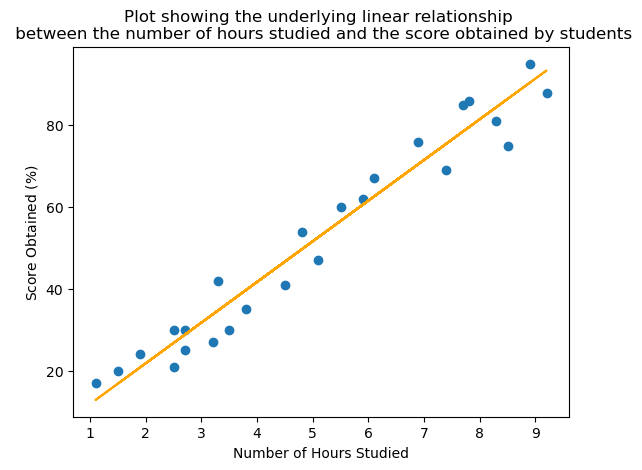

In [20]:
# Plotting the regression line
best_fit = score_model.coef_ * X + score_model.intercept_


# Plotting for the test data
plt.scatter(X,y)
plt.plot(X,best_fit, color='orange')
plt.xlabel('Number of Hours Studied')
plt.ylabel('Score Obtained ($\%$)')
plt.title('Plot showing the underlying linear relationship \n between the number of hours studied and the score obtained by students')
plt.show()

## Making Predictions using the Model

This section prints the testing data **test_X** and uses the trained model to predict the scores based on the testing data **score_model.predict(test_X)**. The predicted scores are stored in **pred_y**.

A new DataFrame **df1** is created to compare the actual scores **test_y** and the predicted scores **pred_y**. It displays the actual and predicted scores side by side.

In [21]:
print(test_X) # Testing data - In Hours
pred_y = score_model.predict(test_X) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


In [22]:
# Comparing Actual scores and the Predicted scores
df1 = pd.DataFrame({'Actual': test_y, 'Predicted': pred_y})  
df1

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


We demonstrate making a prediction for a specific input value (9.5 hours of study). The **score_model.predict([[input_value]])** line is used to predict the corresponding score. The prediction is stored in the prediction variable, and it is printed using **print("Prediction:", prediction[0]**).

In [23]:
# Making a prediction for a specific input
input_value = 9.25
prediction = score_model.predict([[input_value]])

print("Score Prediction for 9.25 hours of study:", prediction[0])

Score Prediction for 9.25 hours of study: 93.89272889341652


## Evaluating the Model

Lastly, we calculate the mean absolute error (MAE) between the actual scores **test_y** and the predicted scores **pred_y** using **mean_absolute_error()**. The MAE is stored in the **val_mae** variable, and it is printed using **print("Validation Mean Absolute Error for the score model is:", val_mae)**.

In [24]:
val_mae = mean_absolute_error(test_y, pred_y)
print("Validation Mean Absolute Error for the score model is:" , val_mae)

Validation Mean Absolute Error for the score model is: 4.130879918502482
